In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install Qiskit
!{sys.executable} -m pip install qiskit_ibm_runtime
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pylatexenc
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install qiskit_aer

In [7]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.primitives import StatevectorSampler


In [ ]:
#Some helper functions

def PrintProbabilitiesAndAmplitudes(psi: Statevector)->None:
    probs = psi.probabilities_dict()

    state_dict = psi.to_dict()
    cleaned_dict = {str(key): complex(value) for key, value in state_dict.items()}  
    cleaned_probs = {str(key): float(value) for key, value in probs.items()} 

    print('Probabilities: {}'.format(cleaned_probs))
    print('Amplitudes: {}'.format(cleaned_dict))

## Basic Quantum Functionalities

A quantum circuit in Qiskit is composed of a $\texttt{QuantumRegister}$ and a $\texttt{ClassicalRegister}$. These registers define the number of qubits and classical bits used in the circuit, respectively.

1. **Quantum Register**:
   A $\texttt{QuantumRegister}$ is initialized using:

   $
   \texttt{qr = QuantumRegister(\#numqubits, 'registername')}
   $
   This creates a quantum register with the specified number of qubits.

2. **Classical Register**:
   A $\texttt{ClassicalRegister}$ is initialized using:
   
   $
   \texttt{cr = ClassicalRegister(\#classicalbits, 'registername')}
   $

   This creates a classical register with the specified number of classical bits for storing measurement results.

3. **Quantum Circuit**:
   A $\texttt{QuantumCircuit}$ is initialized by combining the quantum and classical registers:
   
   $
   \texttt{qc = QuantumCircuit(qr, cr)}
   $

This circuit can now be used to apply quantum gates and perform measurements.

In [ ]:
#Initialize here a QuantumRegister with one qubit and a ClassicalRegister with one bit
#Then create a QuantumCircuit with these registers

#### CODE HERE
qr = 
cr = 
qc = 
####

## State vector

By default, qubits in a quantum circuit are initialized in the $\lvert 0 \rangle$ state. This can be confirmed by computing the state vector of the circuit and visualizing it on the Bloch sphere.

To compute the state vector, use:

$
\texttt{Statevector(quantumcircuit)}
$

This retrieves the quantum state of the circuit as a vector representation. For a single qubit initialized to $\lvert 0 \rangle$, the state vector will be:

$
\psi = \begin{bmatrix} 1 \\ 0 \end{bmatrix},
$

indicating that the qubit is entirely in the $\lvert 0 \rangle$ state.

The Bloch sphere visualization provides a geometric representation of this state. The $\lvert 0 \rangle$ state corresponds to the north pole of the sphere, with coordinates $(x, y, z) = (0, 0, 1)$.

By plotting the Bloch sphere, you can verify that the qubit is correctly initialized to $\lvert 0 \rangle$ before performing further operations.


In [ ]:
# The Statevector class allows us to create a quantum statevector from a quantum circuit.
# This Statevector is computed analytically and can therefore output the probability amplitudes 
# The probability amplitudes are in a real world application not measureable

#### CODE HERE
Psi = 
####

PrintProbabilitiesAndAmplitudes(Psi)

## Bloch Sphere

The Bloch sphere is a geometric representation of the state of a single qubit, where any pure quantum state can be visualized as a point on the surface of the sphere. The axes $x$, $y$, and $z$ correspond to the expectation values of the Pauli matrices $\sigma_x$, $\sigma_y$, and $\sigma_z$, which represent quantum measurements in different bases. The north and south poles of the sphere ($z = +1$ and $z = -1$) correspond to the classical states $\lvert 0 \rangle$ and $\lvert 1 \rangle$, while points on the equator represent equal superpositions of these states with varying phases. This visualization is particularly useful for understanding qubit operations, as rotations on the Bloch sphere correspond to quantum gates.


To print the bloch sphere use plot_bloch_multivector(qc, title='Bloch Sphere')

In [ ]:
plot_bloch_multivector(qc, title='Bloch Sphere')

## X-Gate

The $X$-Gate, also known as the Pauli-X gate, performs a rotation of the qubit's state vector by $\pi$ radians around the x-axis of the Bloch sphere. It acts as a quantum equivalent of a classical bit-flip, swapping the states $\lvert 0 \rangle$ and $\lvert 1 \rangle$:

$
X\lvert 0 \rangle = \lvert 1 \rangle, \quad X\lvert 1 \rangle = \lvert 0 \rangle.
$

The matrix representation of the $X$-Gate is:

$
X = 
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}.
$

To apply an $X$-Gate in Qiskit:
```python
qc.x(qubit_number)

In [ ]:
# New quantum circuit
qc = QuantumCircuit(qr,cr)

#### CODE HERE

####

Psi = Statevector(qc)

PrintProbabilitiesAndAmplitudes(Psi)
plot_bloch_multivector(Psi, title='Bloch Sphere')

## Quantum Circuit

It is possible to visualize the quantum circuit, which provides a graphical representation of your quantum algorithm. A quantum circuit consists of qubits represented as horizontal lines and quantum gates depicted as symbols applied to these lines. This visualization helps to understand the sequence of operations performed on qubits and the overall structure of the algorithm. In Qiskit, you can easily generate and display a quantum circuit diagram using built-in functions.


In [ ]:
qc.draw(output='mpl')

## Hadamard Gate

Now apply a Hadamard Gate to the qubit. The Hadamard Gate is a fundamental quantum gate that creates a uniform superposition of states. It transforms the qubit state such that the probabilities of measuring $\lvert 0 \rangle$ and $\lvert 1 \rangle$ become equal.

After applying the Hadamard Gate, compute the new state vector, print the probabilities and amplitudes, and visualize the Bloch sphere.

The $H$ Hadamard Gate performs the following transformations:

$
H\lvert 0 \rangle = \frac{1}{\sqrt{2}}\left(\lvert 0 \rangle + \lvert 1 \rangle\right), \quad
H\lvert 1 \rangle = \frac{1}{\sqrt{2}}\left(\lvert 0 \rangle - \lvert 1 \rangle\right).
$

Its matrix representation is:

$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}.
$

To apply a Hadamard Gate in Qiskit:
```python
qc.h(qubit_number)

In [ ]:
# New quantum circuit
qc = QuantumCircuit(qr,cr)

#### CODE HERE

####


Psi = Statevector(qc)
PrintProbabilitiesAndAmplitudes(Psi)
plot_bloch_multivector(qc, title='Bloch Sphere')

## Measurement

To extract classical information from a quantum system, we must repeat our experiment multiple times to gather statistical data. Quantum measurement collapses the qubit's wavefunction into a definite state, either $\lvert 0 \rangle$ or $\lvert 1 \rangle$, based on the probabilities encoded in the wavefunction prior to measurement. This collapse is irreversible, and repeated measurements yield results consistent with the probabilities established by the quantum state.

First, apply a measurement to the qubit:
```python
qc.measure(quantumregister,classicalregister)
```

The measurement process allows us to retrieve classical information from the quantum system, but it also disturbs the system and destroys its superposition state. By analyzing multiple measurements, we can infer statistical properties of the original quantum state.


In [ ]:
#### CODE HERE

#### 


qc.draw(output='mpl')

The simulation uses the $\texttt{StatevectorSampler}$ to compute measurement statistics from the quantum circuit. The $\texttt{StatevectorSampler}$ assumes ideal conditions, meaning it works with the exact state vector of the quantum system without introducing noise or imperfections. 

The number of shots specifies how many times the circuit is simulated to approximate measurement probabilities. A higher number of shots improves the accuracy of the resulting statistics by providing a better approximation of the true probabilities encoded in the quantum state.

The output of the simulation is a dictionary of measurement outcomes, where each key represents a bitstring (e.g., $\lvert 0 \rangle$ or $\lvert 1 \rangle$), and the associated value indicates how often that outcome was observed. This histogram of results helps analyze the behavior of the quantum circuit and understand its probabilistic nature.


In [ ]:
sampler = StatevectorSampler()

shots = 1000000

job = sampler.run([qc], shots=shots)
result = job.result()
data = result[0].data
counts = data.c.get_counts()

The function $\texttt{plot\_histogram(counts)}$ is used to visualize the measurement outcomes of a quantum circuit as a histogram. The $\texttt{counts}$ dictionary contains the results of the simulation, where each key represents a measured bitstring (e.g., $\lvert 0 \rangle$ or $\lvert 1 \rangle$), and the corresponding value indicates the frequency of that outcome.

The histogram provides an intuitive way to interpret the probabilities of different measurement results. For example, in a superposition state, the histogram may show equal probabilities for $\lvert 0 \rangle$ and $\lvert 1 \rangle$, while in a collapsed state, only one outcome will dominate. This visualization is particularly useful for analyzing how quantum gates and operations affect the qubit's state.


In [ ]:
from qiskit.visualization import plot_histogram

# Use the plot_histogram function to visualize the counts
plot_histogram(counts)

The probabilities of measuring each quantum state are calculated from the measurement results stored in the $\texttt{counts}$ dictionary. The keys in $\texttt{counts}$ represent the possible outcomes (e.g., $\lvert 0 \rangle$ and $\lvert 1 \rangle$), while the values indicate the frequency of each outcome after running the circuit multiple times.

To compute the probabilities, the frequency of each outcome is divided by the total number of shots (simulations). For example:

$
p_0 = \frac{\text{counts['0']}}{\text{shots}}, \quad p_1 = \frac{\text{counts['1']}}{\text{shots}}
$

These probabilities represent how likely it is to measure $\lvert 0 \rangle$ or $\lvert 1 \rangle$ based on the quantum state of the system. 

In [ ]:
#### CODE HERE
p0 = 
p1 = 
#####
print('Probability measuring state 0: {}'.format(p0))
print('Probability measuring state 1: {}'.format(p1))

## RY Gate

The $R_y(\theta)$ gate, also known as the Rotation-Y gate, performs a rotation of a single qubit's state around the y-axis of the Bloch sphere by an angle $\theta$. This gate is particularly useful for creating superposition states and for parameterized quantum circuits.

The action of the $R_y(\theta)$ gate on the computational basis states is given by:

$
R_y(\theta)\lvert 0 \rangle = \cos\left(\frac{\theta}{2}\right)\lvert 0 \rangle + \sin\left(\frac{\theta}{2}\right)\lvert 1 \rangle,
$

$
R_y(\theta)\lvert 1 \rangle = -\sin\left(\frac{\theta}{2}\right)\lvert 0 \rangle + \cos\left(\frac{\theta}{2}\right)\lvert 1 \rangle.
$

Its matrix representation is:

$
R_y(\theta) =
\begin{bmatrix}
\cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\
\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{bmatrix}.
$

Rotation gates are implemented by specifying the type of gate, the rotation angle, and the target qubit. For example, in Qiskit, you can apply an $R_y$ gate as follows:
```python
qc.ry(rotation_angle,qubit_number)

In [ ]:
from numpy import pi
#New quantum circuit
qc = QuantumCircuit(qr,cr)
rotation_angle = pi/4

#### CODE HERE

####

qc.draw(output='mpl')


In [ ]:
#Visualize the state uisng the Bloch sphere
plot_bloch_multivector(qc, title='Bloch Sphere')

Again sample the state and generate some statistics of the state vector.
Plot the results using a histogram.

In [ ]:
qc.measure(qr,cr)

sampler = StatevectorSampler()

shots = 10000

job = sampler.run([qc], shots=shots)
result = job.result()
data = result[0].data
counts = data.c.get_counts()
plot_histogram(counts)

## CNOT Gate

The Controlled-NOT (CNOT) gate is a two-qubit quantum gate that operates on a control qubit and a target qubit. The state of the control qubit remains unchanged, while the target qubit is flipped (i.e., a NOT operation is applied) if and only if the control qubit is in the state $\lvert 1 \rangle$. If the control qubit is in the state $\lvert 0 \rangle$, no change is made to the target qubit.

The action of the CNOT gate on computational basis states is described as:

$
CNOT\lvert 00 \rangle = \lvert 00 \rangle, \quad
CNOT\lvert 01 \rangle = \lvert 01 \rangle,
$

$
CNOT\lvert 10 \rangle = \lvert 11 \rangle, \quad
CNOT\lvert 11 \rangle = \lvert 10 \rangle.
$

The matrix representation of the CNOT gate is:

$
CNOT =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}.
$

In a quantum circuit, the CNOT gate requires two qubits: one as the control and one as the target. For example, in Qiskit, you can apply a CNOT gate as follows:
```python
qc.cx(control_qubit,target_qubit)

In [ ]:
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr,cr)

#### CODE HERE

####

qc.draw(output='mpl')


## Bell State

Now create a new quantum circuit with two qubits and two classical registers. A Bell state is a maximally entangled two-qubit state that can be generated using one Hadamard gate and one CNOT gate. After preparing the Bell state, measure both qubits to extract statistics and analyze the quantum system.

The Bell state $\lvert \Psi \rangle$ is defined as:

$
\lvert \Psi \rangle = \frac{1}{\sqrt{2}} \left( \lvert 00 \rangle + \lvert 11 \rangle \right).
$

To create this state:
1. Apply a Hadamard gate to the first qubit to place it in a superposition:

$
H\lvert 0 \rangle = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle + \lvert 1 \rangle \right).
$

2. Apply a CNOT gate with the first qubit as the control and the second qubit as the target. This entangles the two qubits, resulting in the Bell state:

$
CNOT\left(\frac{1}{\sqrt{2}} (\lvert 0 \rangle + \lvert 1 \rangle) \otimes \lvert 0 \rangle\right) = 
\frac{1}{\sqrt{2}} (\lvert 00 \rangle + \lvert 11 \rangle).
$

This entangled state demonstrates quantum correlations between the two qubits, meaning their measurement outcomes are perfectly correlated. Measuring both qubits will reveal these correlations, providing insight into the nature of quantum entanglement.


In [ ]:
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr,cr)

#### CODE HERE


####

qc.draw(output='mpl')

Apply a measurement on the circuit.

In [ ]:
qc.measure(qr,cr)

To analyze the accuracy of a quantum state vector, one can vary the number of shots (repeated measurements) and observe how the results converge toward the theoretical probabilities.
Initially, using a low number of shots provides a rough estimate of the measurement statistics due to higher statistical fluctuations. As the number of shots increases, the measurement outcomes become more precise, reducing random noise and better approximating the true probabilities of the quantum state. This process demonstrates how statistical accuracy improves with repeated sampling, reflecting the probabilistic nature of quantum mechanics.
By gradually increasing the shot count, one can observe how the results stabilize and become more reliable.

In [ ]:
sampler = StatevectorSampler()

#### CODE HERE
shots = 
####

job = sampler.run([qc], shots=shots)
result = job.result()
data = result[0].data
counts = data.c.get_counts()
p0 = counts['00']/shots
p3 = counts['11']/shots
print('Probability measuring state 00: {}'.format(p0))
print('Probability measuring state 11: {}'.format(p3))
plot_histogram(counts)

Lets explore the bell state on a real quantum device!

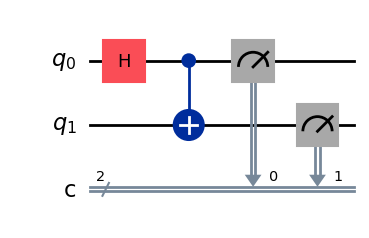

In [3]:
#Create a new quantum circuit and a bell state, make a measurement and draw the circuit
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr,cr)

qc.h(0)
qc.cx(0,1)
qc.measure(qr,cr)
qc.draw(output='mpl')

## Computation on real hardware

To execute quantum circuits on real quantum hardware, you can use the Qiskit Runtime Service to access IBM Quantum backends. The following steps outline the process:

1. **Initialize the Qiskit Runtime Service**:

   $
   \texttt{service = QiskitRuntimeService()}
   $

   This initializes the service, allowing access to available backends.

2. **Filter Backends**:
   The $\texttt{least\_busy()}$ method selects the backend with the fewest pending jobs that meets specified criteria:
   - $\texttt{operational=True}$: Ensures the backend is currently operational.
   - $\texttt{min\_num\_qubits=qc.num\_qubits}$: Filters backends with at least as many qubits as required by the circuit.
   - $\texttt{simulator=False}$: Excludes simulators to focus on real quantum devices.

3. **Select Backend**:
   
   $
   \texttt{backend = service.least\_busy(operational=True, min\_num\_qubits=qc.num\_qubits, simulator=False)}
   $
   
   This returns the least busy backend that satisfies all conditions, ensuring minimal wait time for job execution.

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler
service = QiskitRuntimeService()
backend = service.least_busy(
    operational=True, min_num_qubits=qc.num_qubits, simulator=False
)

The code demonstrates how to optimize and transpile a quantum circuit using Qiskit's PassManager and a preset pass manager tailored to the selected backend. Transpilation is the process of transforming a quantum circuit into a form suitable for execution on a specific quantum device, taking into account hardware constraints like gate set, qubit connectivity, and noise characteristics.

1. **Pass Manager**:
   The $\texttt{PassManager}$ object schedules and executes a sequence of transpiler passes, which are transformations or optimizations applied to the circuit. These passes can reduce gate count, improve circuit connectivity, or reexpress gates in terms of the basis set supported by the hardware.

2. **Preset Pass Manager**:
   The $\texttt{generate\_preset\_pass\_manager}$ function creates a pass manager optimized for the selected backend. The optimization level (e.g., $\texttt{optimization\_level=3}$) determines the aggressiveness of optimization, with higher levels performing more extensive transformations.

3. **Instruction Set Architecture (ISA)**:
   The $\texttt{pm.run(qc)}$ method applies the pass manager to the input circuit ($\texttt{qc}$), transforming it into a hardware-compatible form known as the instruction set architecture (ISA). This process ensures that the circuit adheres to the constraints of the backend.

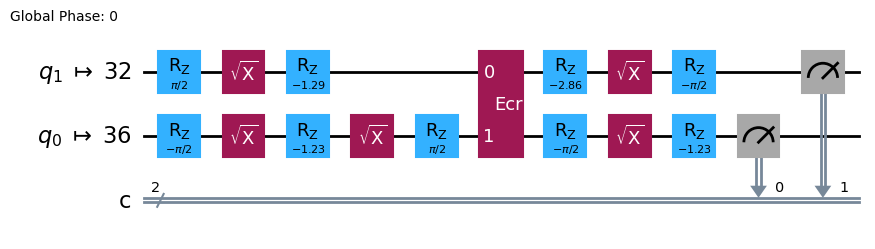

In [5]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
#isa = instruction set architecture
qc_isa = pm.run(qc)
qc_isa.draw(output="mpl", idle_wires=False, style="iqp")

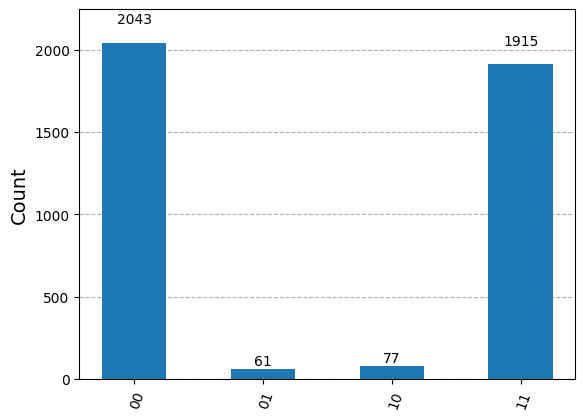

In [8]:
sampler = Sampler(backend)
job = sampler.run([qc_isa])
result = job.result()
data = result[0].data
counts = data.c.get_counts()
plot_histogram(counts)

In [9]:
total_shots = np.sum(list(counts.values()))
probabilities = {state: float(count / total_shots*100) for state, count in counts.items()}
print('Probabilities in %: {}'.format(probabilities))

Probabilities in %: {'11': 46.7529296875, '00': 49.8779296875, '10': 1.8798828125, '01': 1.4892578125}
